# Handwritten Digit Detector using Neural Networks


# Training & Testing

## This notebook contains:
## 1. Importing the Dataset
## 2. Pre-processing the Dataset
## 3. Splitting the Dataset into training, validation & testing parts
## 4. Defining the deep learning model using neural networks
## 5. Training the model using the dataset
## 6. Analyzing model accuracy metrics
## 7. Saving the model for further use

In [1]:
# Importing necessary python libs & modules

import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

In [2]:
# Importing the Dataset & Splitting it into training & testing parts

objects =  tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = objects.load_data()

(60000, 28, 28)


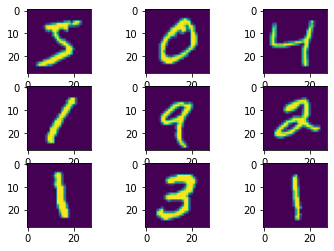

In [3]:
# Printing sample images from dataset

print(x_train.shape)

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i])

In [4]:
# Reshaping the training & testing data to make it suitable for neural network imlementation

x_train  = x_train.reshape(-1, 28 * 28) / 255.0
x_test = x_test.reshape(-1, 28 * 28) / 255.0 

In [5]:
# Reserving sample images for validation

x_validate = x_train[-10000:]
y_validate = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

print(x_train.shape , x_validate.shape)

(50000, 784) (10000, 784)


In [6]:
# Defining the deep learning model using neural networks & printing its summary

model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)), tf.keras.layers.Dense(64, activation='relu'), 
tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Fitting the training data on the defined model

history = model.fit(x_train, y_train,batch_size=128, epochs=32 , validation_data=(x_validate, y_validate))

Epoch 1/32
391/391 [==============================] - 1s 2ms/step - loss: 0.3724 - accuracy: 0.8959 - val_loss: 0.1773 - val_accuracy: 0.9502
Epoch 2/32
391/391 [==============================] - 1s 2ms/step - loss: 0.1556 - accuracy: 0.9547 - val_loss: 0.1287 - val_accuracy: 0.9642
Epoch 3/32
391/391 [==============================] - 1s 2ms/step - loss: 0.1091 - accuracy: 0.9673 - val_loss: 0.1086 - val_accuracy: 0.9699
Epoch 4/32
391/391 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9753 - val_loss: 0.0966 - val_accuracy: 0.9715
Epoch 5/32
391/391 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9805 - val_loss: 0.0885 - val_accuracy: 0.9735
Epoch 6/32
391/391 [==============================] - 1s 2ms/step - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0860 - val_accuracy: 0.9750
Epoch 7/32
391/391 [==============================] - 1s 2ms/step - loss: 0.0422 - accuracy: 0.9877 - val_loss: 0.0832 - val_accuracy: 0.9760
Epoch 

In [8]:
# Predicting the test data using the trained neural network

prediction = model.predict(x_test)
predict = [np.argmax(i) for i in prediction]

Text(69.0, 0.5, 'Truth')

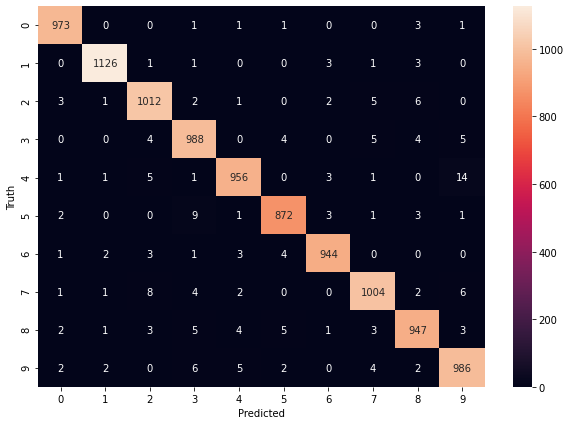

In [9]:
# Printing Confusion Matrix

cm = tf.math.confusion_matrix(labels=y_test,predictions=predict)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
# Printing Classification Report

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [11]:
# Saving the model for further use

model.save("trained_model.h5")